In [83]:
import string
import numpy as np
import torch, torch.nn as nn
import torch.nn.functional as F
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
from dataset import Dataset
from model import CharLSTMLoop_hidden

In [86]:
ds = Dataset('sonnets_upd.txt')
model = CharLSTMLoop_hidden(num_tokens=ds.num_tokens)
if (torch.cuda.is_available()):
  model = model.cuda()
opt = torch.optim.Adam(model.parameters())

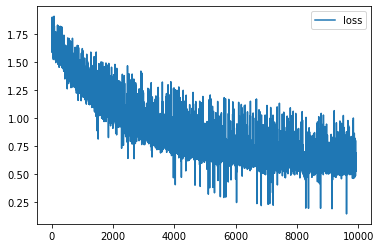

In [88]:
seq_size=32
batch_size=16


idx_text = [token_to_idx[w] for w in text]
num_batches = len(idx_text) // (seq_size * batch_size)
in_text = idx_text[:num_batches * batch_size * seq_size]
out_text = np.zeros_like(in_text)
out_text[:-1] = in_text[1:]
out_text[-1] = in_text[0]

in_text = np.reshape(in_text, (batch_size, -1))
out_text = np.reshape(out_text, (batch_size, -1))


history = []


h = model.init_hidden(batch_size)
for i in range(10000):
    i = random.randint(0, num_batches)
    batch_ix = in_text[:, i:i+seq_size]
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    if (torch.cuda.is_available()):
      batch_ix = batch_ix.cuda()

    # print(batch_ix.size())
    #h.detach_()
    if (torch.cuda.is_available()):
      h = tuple([e.data.cuda() for e in h])
    else:
      h = tuple([e.data for e in h])


    logp_seq, h = model(batch_ix, h)


    
    # compute loss

    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    
    
    # train with backprop

    logp_next = torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None])

    loss = -logp_next.mean()
    loss.backward()
    opt.step()
    opt.zero_grad()
    if (torch.cuda.is_available()):
      history.append(loss.cpu().data.numpy())
    else:
      history.append(loss.data.numpy())
    
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()
        torch.save(model.state_dict(), 'model_lstm_hidden.pth')
        torch.save(opt.state_dict(), 'optimizer_lstm_hidden.pth')


In [91]:
print(str(generate_text_hidden(length=500, model=model, dataset=ds, initial='andrey biba')))

andrey bibak dumose that god for ep the show ix , and sunst agree than that tongue that thy lie,--
  a creast your slave,
  i should in thave, ang the eloquence
  and that when i in earth altaifest full flame should autenbires tu hast thou timp doth wer doth shormd to me best,
   and racks iss that parakt thy fair appy thope that she forks my might,
  with insufficiency my hear sthough i should by the beautyo    although she knecres cleart thourir this that pear not i thine own,
  in ompend:
  but a beauty
